In [1]:
import os
import re
import pdfplumber
import pandas as pd
from docx2python import docx2python
import textract
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import nltk

pd.options.display.max_rows = None

In [2]:
statuts_types = ['entreprise unipersonnelle à responsabilité limitée',
                'entreprise individuelle à responsabilité limitée',
                'société par actions simplifiée unipersonnelle',
                'société à responsabilité limitée',
                'société par actions simplifiée',
                'société civile immobilière',
                'société en nom collectif',
                'société en participation',
                'société anonyme',
                'entreprise individuelle']

statuts_types_with_e = ['entreprise unipersonnelle a responsabilite limitee',
                'entreprise individuelle a responsabilite limitee',
                'societe par actions simplifiee unipersonnelle',
                'societe a responsabilite limitee',
                'societe par actions simplifiee',
                'societe civile immobiliere',
                'societe en nom collectif',
                'societe en participation',
                'societe anonyme',
                'entreprise individuelle']

statuts_types_abb =["EURL",
                  "EIRL",
                  "SASU",
                  "SARL",  
                  "SAS",
                  "SCI",
                  "SNC",
                  "SEP",  
                  "SA",
                  "EI"]

In [3]:
docx_docs_path = []
doc_docs_path = []
pdf_docs_path = []
for root, dirs, files in os.walk("Docs/"):
    for file in files:
        if file.endswith(".pdf"):
            pdf_docs_path.append(os.path.join(root, file))
        elif file.endswith(".docx"):
            docx_docs_path.append(os.path.join(root,file))
        else:
            doc_docs_path.append(os.path.join(root,file))            

In [4]:
set(stopwords.words('french') + list(punctuation))

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 '

In [5]:
docs_text = []
for file in docx_docs_path:
    docs_text.append(docx2python(file).text.replace("\n", " ").replace("\t"," "))

for file in doc_docs_path:
    docs_text.append(textract.process(file).decode("utf-8").replace("\n", " ").replace("\t"," "))

for file in pdf_docs_path:
    with pdfplumber.open(file) as pdf:
        pdf_text = ""
        for page in pdf.pages:
            if page.extract_text():
                pdf_text += page.extract_text()
        docs_text.append(pdf_text.replace("\n", " ").replace("\t"," "))
docx_docs_path

['Docs/guichetunique_9.docx',
 'Docs/coover_1.docx',
 'Docs/hoggo_4.docx',
 'Docs/guichetunique_4.docx',
 'Docs/coover_3.docx',
 'Docs/guichetunique_3.docx',
 'Docs/coover_4.docx',
 'Docs/leblogdudirigeant_4.docx',
 'Docs/ecriture-comptable_1.docx',
 'Docs/hoggo_2.docx',
 'Docs/guichetunique_7.docx',
 'Docs/traductions-assermentees_1.docx',
 'Docs/hoggo_5.docx',
 'Docs/guichetunique_2.docx',
 'Docs/coover_2.docx',
 'Docs/hoggo_6.docx',
 'Docs/leblogdudirigeant_2.docx',
 'Docs/coover_5.docx',
 'Docs/start-up_1.docx',
 'Docs/guichetunique_5.docx',
 'Docs/guichetunique_8.docx',
 'Docs/guichetunique_6.docx',
 'Docs/traductions-assermentees_2.docx',
 'Docs/guelmiminvest_1.docx',
 'Docs/flasheconomie_2.docx',
 'Docs/leblogdudirigeant_3.docx',
 'Docs/cfetogo_2.docx',
 'Docs/hoggo_1.docx',
 'Docs/cfetogo_1.docx',
 'Docs/creerentreprise_2.docx',
 'Docs/hoggo_3.docx',
 'Docs/leblogdudirigeant_1.docx',
 'Docs/guichetunique_1.docx']

In [6]:
cls_base = []
for text in docs_text:
    i = text.lower().find("article")
    cls_base.append(text.lower()[:i])
cls_base

['statuts societe en participation    entre les soussignés\xa0: -    -- m … (indiquer identité et adresse)  -- m … (indiquer identité et adresse)  il est établi, ainsi qu’il suit, les statuts de la société en participation devant exister entre eux.    ',
 "..... (dénomination sociale)  entreprise unipersonnelle à responsabilité limitée au capital de ..... (capital) euros  ..... (siège social)  rcs en cours d'attribution  ci-après désignée la « société »      statuts eurl    le soussigné :    (personne morale :)  ..... (dénomination sociale), ..... (forme) au capital de ..... (capital) euros, immatriculée au registre du commerce et des sociétés de ..... (rcs), sous le numéro ..... (numéro siren), dont le siège social est situé ..... (siège social),    représentée par ..... (prénom) ..... (nom) en sa qualité de ..... (qualité) dûment habilité aux fins des présentes.    ou   (personne physique :)  ..... (prénom) ..... (nom), demeurant à ..... (adresse), né(e) le ..... (date de naissance) 

In [7]:
docs_class = []
for text in cls_base:
    for i,statut in enumerate(statuts_types):
        abb, statut_with_e = statuts_types_abb[i], statuts_types_with_e[i]
        if statut in text or statut_with_e in text or abb.lower() in text:
            cls = abb
            break
        cls = "Inconnu"
    docs_class.append(cls)
len(docs_class)

50

In [8]:
df = pd.DataFrame(zip(docx_docs_path + doc_docs_path + pdf_docs_path, docs_text, cls_base, docs_class), columns= ["Path", "Content", "Header", "Type"])
df

,Path,Content,Header,Type
0,Docs/guichetunique_9.docx,STATUTS SOCIETE EN PARTICIPATION Entre les ...,statuts societe en participation entre les ...,SEP
1,Docs/coover_1.docx,..... (dénomination sociale) Entreprise unipe...,..... (dénomination sociale) entreprise unipe...,EURL
2,Docs/hoggo_4.docx,[Nom de la société] Société civile immobilièr...,[nom de la société] société civile immobilièr...,SCI
3,Docs/guichetunique_4.docx,""" MODELE "" 5 BIS- STATUTS- ""SOCIETE ANONYME A...",""" modele "" 5 bis- statuts- ""societe anonyme a...",SA
4,Docs/coover_3.docx,"… (dénomination sociale), Société par actions...","… (dénomination sociale), société par actions...",SAS
5,Docs/guichetunique_3.docx,"""MODELE"" ""SOCIETE ANONYME AVEC CONSEIL D'AD...","""modele"" ""societe anonyme avec conseil d'ad...",SA
6,Docs/coover_4.docx,..... (dénomination sociale) Société à respon...,..... (dénomination sociale) société à respon...,SARL
7,Docs/leblogdudirigeant_4.docx,"* Chaque cas étant particulier, il est i...","* chaque cas étant particulier, il est i...",SARL
8,Docs/ecriture-comptable_1.docx,...,...,SARL
9,Docs/hoggo_2.docx,[Nom de la société] Société par actions simpl...,[nom de la société] société par actions simpl...,SAS


In [9]:
df["Type"].value_counts()

SARL       20
SAS        10
SA          5
SCI         5
SASU        4
EURL        2
Inconnu     2
SEP         1
SNC         1
Name: Type, dtype: int64

In [10]:
df["Type"] = df["Type"].astype('category')
df["Type Code"]= df["Type"].cat.codes
df

,Path,Content,Header,Type,Type Code
0,Docs/guichetunique_9.docx,STATUTS SOCIETE EN PARTICIPATION Entre les ...,statuts societe en participation entre les ...,SEP,7
1,Docs/coover_1.docx,..... (dénomination sociale) Entreprise unipe...,..... (dénomination sociale) entreprise unipe...,EURL,0
2,Docs/hoggo_4.docx,[Nom de la société] Société civile immobilièr...,[nom de la société] société civile immobilièr...,SCI,6
3,Docs/guichetunique_4.docx,""" MODELE "" 5 BIS- STATUTS- ""SOCIETE ANONYME A...",""" modele "" 5 bis- statuts- ""societe anonyme a...",SA,2
4,Docs/coover_3.docx,"… (dénomination sociale), Société par actions...","… (dénomination sociale), société par actions...",SAS,4
5,Docs/guichetunique_3.docx,"""MODELE"" ""SOCIETE ANONYME AVEC CONSEIL D'AD...","""modele"" ""societe anonyme avec conseil d'ad...",SA,2
6,Docs/coover_4.docx,..... (dénomination sociale) Société à respon...,..... (dénomination sociale) société à respon...,SARL,3
7,Docs/leblogdudirigeant_4.docx,"* Chaque cas étant particulier, il est i...","* chaque cas étant particulier, il est i...",SARL,3
8,Docs/ecriture-comptable_1.docx,...,...,SARL,3
9,Docs/hoggo_2.docx,[Nom de la société] Société par actions simpl...,[nom de la société] société par actions simpl...,SAS,4


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= set(stopwords.words('french') + list(punctuation)))
X = vectorizer.fit_transform(cls_base)

In [12]:
print(vectorizer.get_feature_names())
print(X.shape)

['000', '03', '06', '07', '10', '1000', '12', '13', '152', '16', '1901', '1975', '1979', '1980', '1981', '1er', '2000', '2015', '5000', '60', '75001', '75006', '75011', '_____________________', '________________________', 'acquérir', 'acte', 'actes', 'actionnaire', 'actions', 'adapter', 'adapté', 'administrateur', 'administration', 'adopter', 'adresse', 'agit', 'aide', 'ainsi', 'ajouter', 'an', 'anne', 'annexée', 'année', 'anonyme', 'août', 'appartenant', 'appelé', 'application', 'apport', 'apports', 'après', 'arrêter', 'assermentees', 'associations', 'associe', 'associes', 'associé', 'associés', 'assume', 'attestation', 'attribution', 'aucun', 'auprès', 'autant', 'auteurs', 'autre', 'autres', 'avant', 'avertis', 'avertissement', 'avocat', 'avoir', 'avril', 'besoins', 'bien', 'bis', 'bleu', 'boleyn', 'boulevard', 'boîte', 'capital', 'capitaux', 'carte', 'cas', 'celles', 'cet', 'cette', 'ceux', 'cfa', 'chacun', 'chapitre', 'chaque', 'chiche', 'choix', 'ci', 'cin', 'circonstances', 'civi

In [13]:
print(X[0,])

  (0, 208)	0.15975652841304272
  (0, 150)	0.15975652841304272
  (0, 458)	0.0798059311612179
  (0, 479)	0.09160876519353145
  (0, 38)	0.09160876519353145
  (0, 524)	0.09345017372322507
  (0, 35)	0.2560526976549218
  (0, 247)	0.37044573142854376
  (0, 259)	0.35884690717393686
  (0, 470)	0.14057416362181385
  (0, 198)	0.2881055838906877
  (0, 359)	0.6634061762810588
  (0, 456)	0.13097976543611034
  (0, 475)	0.1596118623224358


In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

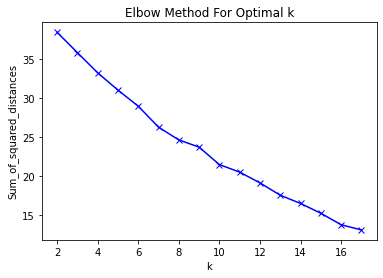

In [15]:
Sum_of_squared_distances = []
K = range(2,18)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
df["Cluster"] = labels
df.sort_values("Cluster")

,Path,Content,Header,Type,Type Code,Cluster
17,Docs/coover_5.docx,Statuts SASU « Dénomination sociale » … ...,statuts sasu « dénomination sociale » … ...,SASU,5,0
1,Docs/coover_1.docx,..... (dénomination sociale) Entreprise unipe...,..... (dénomination sociale) entreprise unipe...,EURL,0,0
30,Docs/hoggo_3.docx,Statuts de SCI (formule simplifiée) Dan...,statuts de sci (formule simplifiée) dan...,SCI,6,0
21,Docs/guichetunique_6.docx,Modèle : statuts d’une SAS (avec Présid...,modèle : statuts d’une sas (avec présid...,SAS,4,0
4,Docs/coover_3.docx,"… (dénomination sociale), Société par actions...","… (dénomination sociale), société par actions...",SAS,4,0
46,Docs/guichet_1.pdf,MODELE DE STATUTS D’UNE SOCIETE D’IMPACT S...,modele de statuts d’une societe d’impact s...,SARL,3,0
6,Docs/coover_4.docx,..... (dénomination sociale) Société à respon...,..... (dénomination sociale) société à respon...,SARL,3,0
14,Docs/coover_2.docx,Statuts de SCI (formule simplifiée) Dans la...,statuts de sci (formule simplifiée) dans la...,SCI,6,0
22,Docs/traductions-assermentees_2.docx,"<a href=""https://traductions-assermentees.com/...","<a href=""https://traductions-assermentees.com/...",SARL,3,0
11,Docs/traductions-assermentees_1.docx,"<a href=""https://traductions-assermentees.com/...","<a href=""https://traductions-assermentees.com/...",SAS,4,0


Cluster: 0


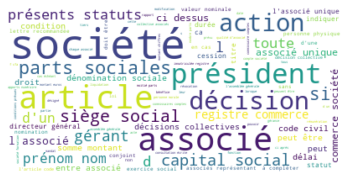

Cluster: 1


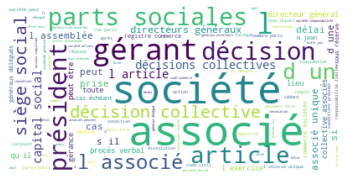

Cluster: 2


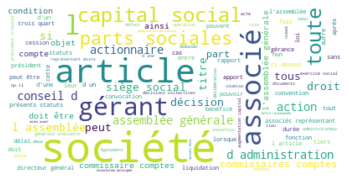

Cluster: 3


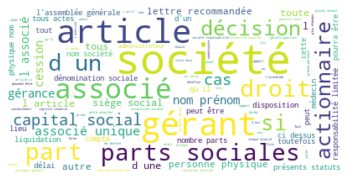

Cluster: 4


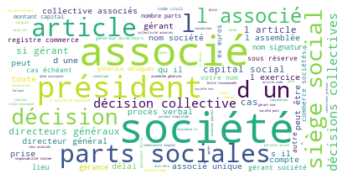

Cluster: 5


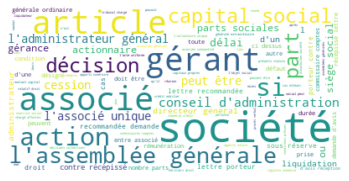

Cluster: 6


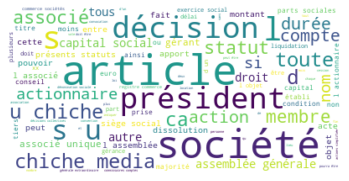

Cluster: 7


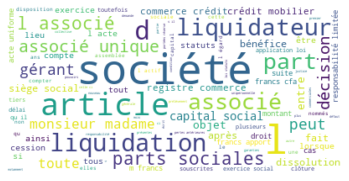

Cluster: 8


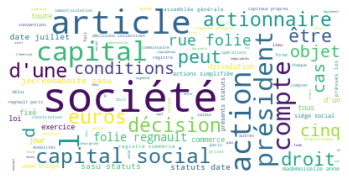

In [17]:
from wordcloud import WordCloud
for k in range(0,true_k):
    s=df[df.Cluster==k]
    text=s['Content'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word not in set(stopwords.words('french') + list(punctuation))])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
#     print('Titles')
#     titles=wiki_cl[wiki_cl.cluster==k]['title']
#     print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
